In [1]:
import os
import sys
from pathlib import Path
import numpy as np

# В Jupyter notebook используем текущую рабочую директорию
# Переходим на один уровень вверх от scripts к корню проекта spores/4/
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(project_root)

print(f"Добавлен путь к sys.path: {project_root}")

Добавлен путь к sys.path: c:\GitHub\spores\5


In [2]:
from src.ellipse import Ellipse

In [3]:
A = np.array([1, 2])
B = np.array([3, 1])

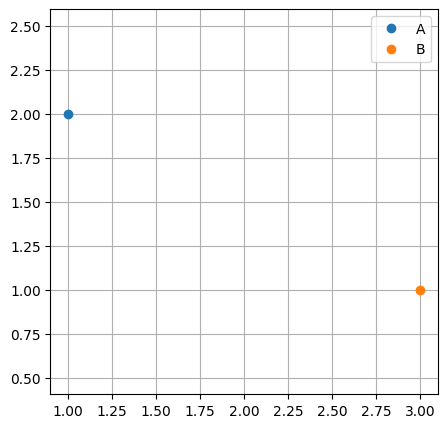

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plt.plot(A[0], A[1], 'o', label='A')
plt.plot(B[0], B[1], 'o', label='B')

plt.legend()
plt.grid()
plt.axis('equal')
plt.show()

In [5]:
n0 = B - A
n = n0 / np.linalg.norm(n0)
print(n)
N = np.outer(n, n)
N

[ 0.89442719 -0.4472136 ]


array([[ 0.8, -0.4],
       [-0.4,  0.2]])

In [6]:
points0 = np.random.randn(100, 2)
points1 = points0 / np.linalg.norm(points0, axis=1, keepdims=True)
print('points1')
print(points1[:10])

c = np.linalg.norm(A - B) / 2
e = 0.8
a = c / e
b = a * np.sqrt(1 - e**2)

M = a * N + b * (np.eye(2) - N)

points2 = points1 @ M
print('points2')
print(points2[:10])

points3 = points2 + (A + B) / 2
print('points3')
print(points3[:10])


points1
[[-0.01041849  0.99994573]
 [ 0.89873313 -0.43849603]
 [ 0.54912484  0.83574033]
 [-0.13442548  0.99092371]
 [ 0.82707245  0.56209533]
 [ 0.98178825 -0.18997851]
 [-0.94120202 -0.33784429]
 [-0.65977789  0.75146067]
 [-0.89229532 -0.45145217]
 [-0.75384887 -0.65704785]]
points2
[[-0.23699012  0.95260696]
 [ 1.253587   -0.61767828]
 [ 0.51915405  0.67144014]
 [-0.39441337  0.97176188]
 [ 0.93771105  0.34923641]
 [ 1.30480401 -0.40007659]
 [-1.13459594 -0.11060402]
 [-1.01633393  0.86166561]
 [-1.0463112  -0.22950474]
 [-0.8223326  -0.45584582]]
points3
[[1.76300988 2.45260696]
 [3.253587   0.88232172]
 [2.51915405 2.17144014]
 [1.60558663 2.47176188]
 [2.93771105 1.84923641]
 [3.30480401 1.09992341]
 [0.86540406 1.38939598]
 [0.98366607 2.36166561]
 [0.9536888  1.27049526]
 [1.1776674  1.04415418]]


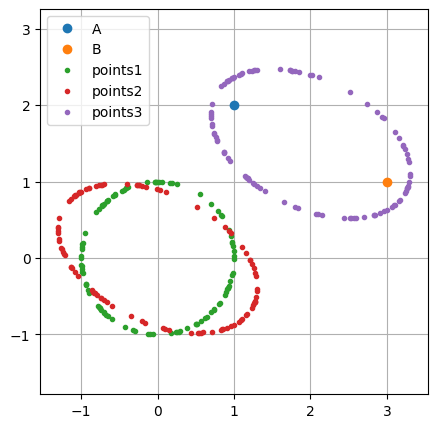

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))

plt.plot(A[0], A[1], 'o', label='A')
plt.plot(B[0], B[1], 'o', label='B')
plt.plot(points1.T[0], points1.T[1], '.', label='points1')
plt.plot(points2.T[0], points2.T[1], '.', label='points2')
plt.plot(points3.T[0], points3.T[1], '.', label='points3')

plt.legend()
plt.grid()
plt.axis('equal')
plt.show()

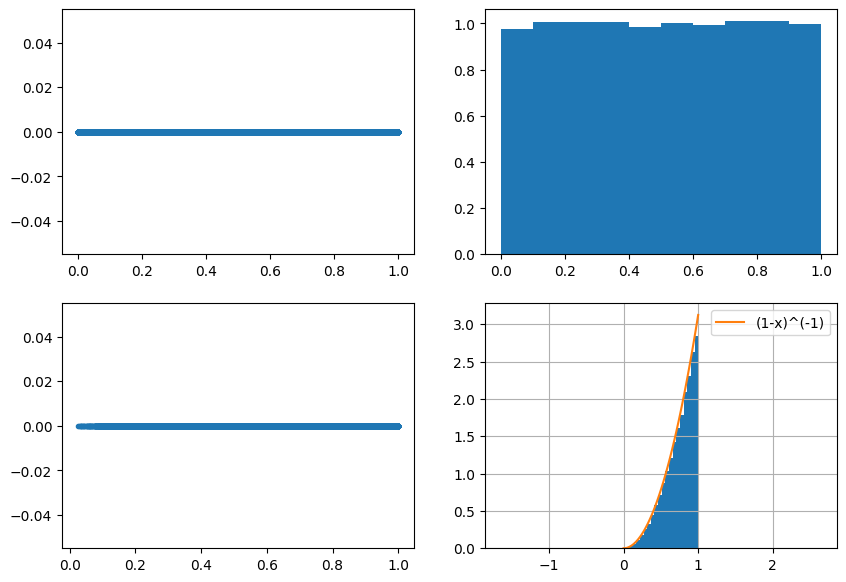

In [8]:
uniform_points = np.random.uniform(0, 1, 100000)
radii = uniform_points ** (1/3)

plt.figure(figsize=(10, 7))
plt.subplot(2, 2, 1)
plt.plot(uniform_points, np.zeros_like(uniform_points), '.', label='uniform_points')
plt.subplot(2, 2, 2)
plt.hist(uniform_points, bins=10, density=True)
plt.subplot(2, 2, 3)
plt.plot(radii, np.zeros_like(radii), '.', label='radii')
plt.subplot(2, 2, 4)
plt.hist(radii, bins=20, density=True)

x = np.linspace(0, 1, 100)
y = x**2 * 10 / 3.2
plt.plot(x, y, label='(1-x)^(-1)')


plt.legend()
plt.grid()
plt.axis('equal')
plt.show()


In [9]:
from src.ellipse2 import EllipsoidSampler

In [22]:
sampler = EllipsoidSampler(focus1=A, focus2=B, eccentricity=0.95)

density = 1000
inside_points = sampler.sample_poisson_disk(min_radius=0.075)
boundary_points = sampler.get_points(n_points=density)

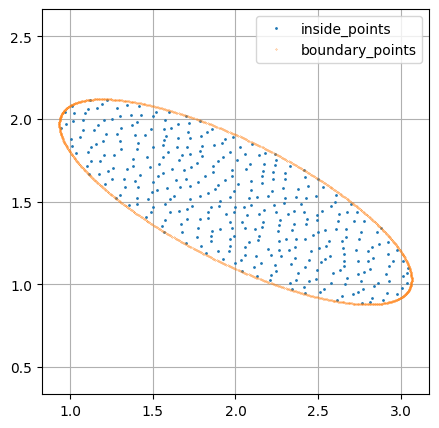

In [23]:

plt.figure(figsize=(5, 5))
plt.plot(inside_points.T[0], inside_points.T[1], 
         '.', 
         markersize=2,
         alpha=1, 
         label='inside_points')

plt.plot(boundary_points.T[0], boundary_points.T[1], 
         '.', 
         markersize=1/2, 
         alpha=1, 
         label='boundary_points')

plt.legend()
plt.grid()
plt.axis('equal')
plt.show()